<a href="https://www.kaggle.com/code/ainurrohmanbwx/future-sales-prediction-eda-5-algorithms?scriptVersionId=146244425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

In the analysis of the "Future Sales Prediction" dataset, we conducted a comprehensive series of data analysis steps to create an accurate prediction model. The process began with Exploratory Data Analysis (EDA) to understand the dataset's characteristics. Subsequently, we performed data preprocessing, including outlier detection and handling using the winzoring technique, as well as data normalization using the min-max method. We then developed multiple models, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest, all of which were evaluated through cross-validation. The model evaluation results revealed that Random Forest outperformed others, yielding an average Mean Squared Error (MSE) of 10.32%, Root Mean Squared Error (RMSE) of 8.09%, Mean Absolute Error (MAE) of 5.99%, and an R-squared value of 94.27%. Additionally, we conducted classic assumption tests, including tests for linearity, homoscedasticity, normality, multicollinearity, outliers, and independence, to ensure the validity of our model. These results provide in-depth insights into the quality of our prediction model and its relevance in the context of future sales forecasting.

# Load Data

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/future-sales-prediction/Sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Features explanation:

- **TV**: this feature represents the amount of advertising budget spent on television media for a product or service in a certain period, for example in thousands of dollars (USD).
- **Radio**: this feature represents the amount of advertising budget spent on radio media in the same period as TV.
- **Newspaper**: this feature represents the amount of advertising budget spent in newspapers or print media in the same period as TV and Radio.
- **Sales**: This feature represents product or service sales data in the same period as advertising expenditure on TV, Radio and Newspaper.

In [2]:
df.shape

(200, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


# Exploratory Data Analysis (EDA)

In [5]:
import plotly.express as px

figure = px.scatter(df, x='Sales', y='TV', size='TV', trendline='ols', title='Relationship Between Sales and TV Advertising')
figure.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
figure.update_layout(
    xaxis_title='Sales',
    yaxis_title='TV Advertising',
    legend_title='TV Ad Size',
    plot_bgcolor='white'
)
figure.show()


In [6]:
figure = px.scatter(df, x='Sales', y='Newspaper', size='Newspaper', trendline='ols', title='Relationship Between Sales and Newspaper Advertising')
figure.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
figure.update_layout(
    xaxis_title='Sales',
    yaxis_title='Newspaper Advertising',
    legend_title='Newspaper Ad Size',
    plot_bgcolor='white'
)
figure.show()


In [7]:
figure = px.scatter(df, x='Sales', y='Radio', size='Radio', trendline='ols', title='Relationship Between Sales and Radio Advertising')
figure.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
figure.update_layout(
    xaxis_title='Sales',
    yaxis_title='Radio Advertising',
    legend_title='Radio Ad Size',
    plot_bgcolor='white'
)
figure.show()


In [8]:
# Calculate the correlation
correlation = df.corr()
sales_correlation = correlation["Sales"].sort_values(ascending=False)

# Format and style the correlation values
styled_sales_correlation = sales_correlation.apply(lambda x: f'{x:.2f}')
styled_sales_correlation = styled_sales_correlation.reset_index()
styled_sales_correlation.columns = ["Feature", "Correlation with Sales"]
styled_sales_correlation.style.background_gradient(cmap='coolwarm', axis=0)


,Feature,Correlation with Sales
0,Sales,1.00
1,TV,0.90
2,Radio,0.35
3,Newspaper,0.16


# Data Preprocessing

#### Outlier detection

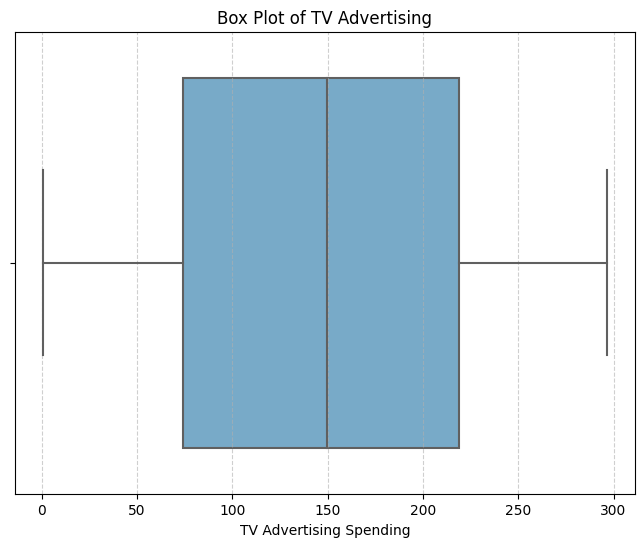

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='TV', data=df, palette='Blues')
plt.title('Box Plot of TV Advertising')
plt.xlabel('TV Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

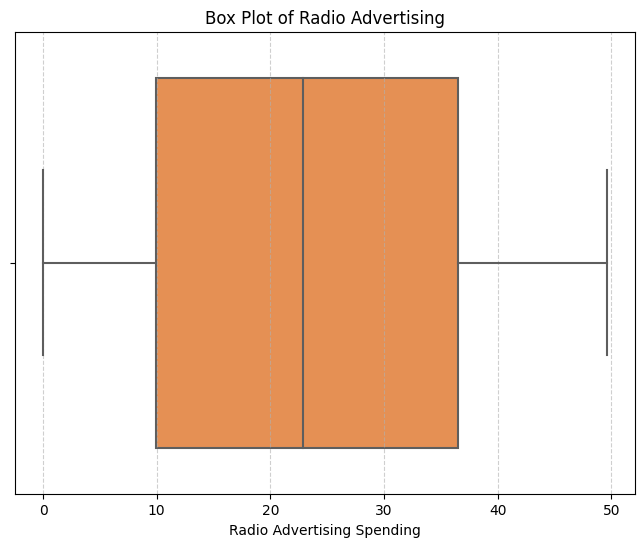

In [10]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Radio', data=df, palette='Oranges')
plt.title('Box Plot of Radio Advertising')
plt.xlabel('Radio Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

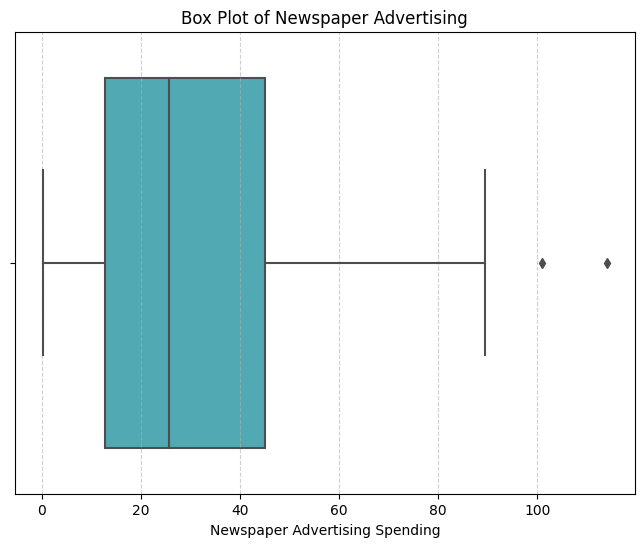

In [11]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Newspaper', data=df, palette='YlGnBu')
plt.title('Box Plot of Newspaper Advertising')
plt.xlabel('Newspaper Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

There are outliers in the Newspaper feature. To overcome this, we use the Winsorizing technique. Winsorizing is a technique that replaces outlier values with certain predetermined threshold values. We set the threshold value for the Newspaper feature at 2.

In [12]:
import numpy as np

# Ambang batas atas (threshold) untuk Winsorizing
upper_threshold = 2 * np.std(df['Newspaper']) + np.mean(df['Newspaper'])

# Menerapkan Winsorizing pada kolom 'Newspaper'
df['Newspaper'] = np.where(df['Newspaper'] > upper_threshold, upper_threshold, df['Newspaper'])

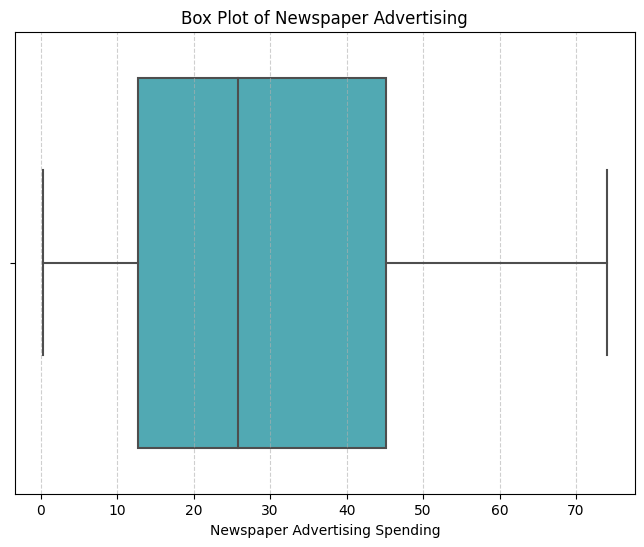

In [13]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Newspaper', data=df, palette='YlGnBu')
plt.title('Box Plot of Newspaper Advertising')
plt.xlabel('Newspaper Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

#### Data normalization

At this stage, we use the min-max technique. Min-Max is a data preprocessing technique used in data analysis and machine learning to convert values in a dataset into a certain range, usually between 0 and 1.

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Columns to be normalized (e.g., TV, Radio, Newspaper)
columns_to_normalize = ['TV', 'Radio', 'Newspaper']

# Apply Min-Max normalization to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.934843,22.1
1,0.148123,0.792339,0.607851,10.4
2,0.055800,0.925403,0.936200,12.0
3,0.509976,0.832661,0.789664,16.5
4,0.609063,0.217742,0.788307,17.9


# Modelling and Evaluation

At the modeling stage, we use 5 algorithms for comparison, namely Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest.

And for evaluation using MSE, RMSE, MAE and R-Squared.

In [15]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [16]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation (can be adjusted to the desired number of folds)
num_folds = 5

# Function to perform cross-validation and calculate metrics in percentage
def perform_cross_validation(model, X, y, num_folds):
    mse_scores = -cross_val_score(model, X, y, cv=num_folds, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    mae_scores = -cross_val_score(model, X, y, cv=num_folds, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=num_folds, scoring='r2')
    
    return mse_scores, rmse_scores, mae_scores, r2_scores

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear Regression
linear_model = LinearRegression()
linear_mse, linear_rmse, linear_mae, linear_r2 = perform_cross_validation(linear_model, X, y, num_folds)
print("Linear Regression:")
print(f"Average MSE: {np.mean(linear_mse) / np.mean(y) * 100:.2f}%")
print(f"Average RMSE: {np.mean(linear_rmse) / np.mean(y) * 100:.2f}%")
print(f"Average MAE: {np.mean(linear_mae) / np.mean(y) * 100:.2f}%")
print(f"Average R-squared: {np.mean(linear_r2) * 100:.2f}%")
print("\n")

Linear Regression:
Average MSE: 18.90%
Average RMSE: 11.01%
Average MAE: 8.38%
Average R-squared: 89.53%




In [18]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge_mse, ridge_rmse, ridge_mae, ridge_r2 = perform_cross_validation(ridge_model, X, y, num_folds)
print("Ridge Regression:")
print(f"Average MSE: {np.mean(ridge_mse) / np.mean(y) * 100:.2f}%")
print(f"Average RMSE: {np.mean(ridge_rmse) / np.mean(y) * 100:.2f}%")
print(f"Average MAE: {np.mean(ridge_mae) / np.mean(y) * 100:.2f}%")
print(f"Average R-squared: {np.mean(ridge_r2) * 100:.2f}%")
print("\n")

Ridge Regression:
Average MSE: 19.67%
Average RMSE: 11.20%
Average MAE: 8.54%
Average R-squared: 89.19%




In [19]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust alpha as needed
lasso_mse, lasso_rmse, lasso_mae, lasso_r2 = perform_cross_validation(lasso_model, X, y, num_folds)
print("Lasso Regression:")
print(f"Average MSE: {np.mean(lasso_mse) / np.mean(y) * 100:.2f}%")
print(f"Average RMSE: {np.mean(lasso_rmse) / np.mean(y) * 100:.2f}%")
print(f"Average MAE: {np.mean(lasso_mae) / np.mean(y) * 100:.2f}%")
print(f"Average R-squared: {np.mean(lasso_r2) * 100:.2f}%")
print("\n")

Lasso Regression:
Average MSE: 115.55%
Average RMSE: 27.51%
Average MAE: 22.39%
Average R-squared: 35.98%




In [20]:
from sklearn.tree import DecisionTreeRegressor

# Decision Trees
tree_model = DecisionTreeRegressor(max_depth=None, random_state=0)  # You can adjust parameters as needed
tree_mse, tree_rmse, tree_mae, tree_r2 = perform_cross_validation(tree_model, X, y, num_folds)
print("Decision Trees:")
print(f"Average MSE: {np.mean(tree_mse) / np.mean(y) * 100:.2f}%")
print(f"Average RMSE: {np.mean(tree_rmse) / np.mean(y) * 100:.2f}%")
print(f"Average MAE: {np.mean(tree_mae) / np.mean(y) * 100:.2f}%")
print(f"Average R-squared: {np.mean(tree_r2) * 100:.2f}%")
print("\n")

Decision Trees:
Average MSE: 16.73%
Average RMSE: 10.40%
Average MAE: 7.56%
Average R-squared: 90.65%




In [21]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust parameters as needed
forest_mse, forest_rmse, forest_mae, forest_r2 = perform_cross_validation(forest_model, X, y, num_folds)
print("Random Forest:")
print(f"Average MSE: {np.mean(forest_mse) / np.mean(y) * 100:.2f}%")
print(f"Average RMSE: {np.mean(forest_rmse) / np.mean(y) * 100:.2f}%")
print(f"Average MAE: {np.mean(forest_mae) / np.mean(y) * 100:.2f}%")
print(f"Average R-squared: {np.mean(forest_r2) * 100:.2f}%")

Random Forest:
Average MSE: 10.32%
Average RMSE: 8.09%
Average MAE: 5.99%
Average R-squared: 94.27%


# Classic assumption test

At the classical assumption testing stage, 5 assumption tests are used, namely linearity test, homoscedasticity test, normality test, multicollinearity test, outliers test, and independent test.

In [22]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Adding a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Residuals (model residuals)
residuals = model.resid

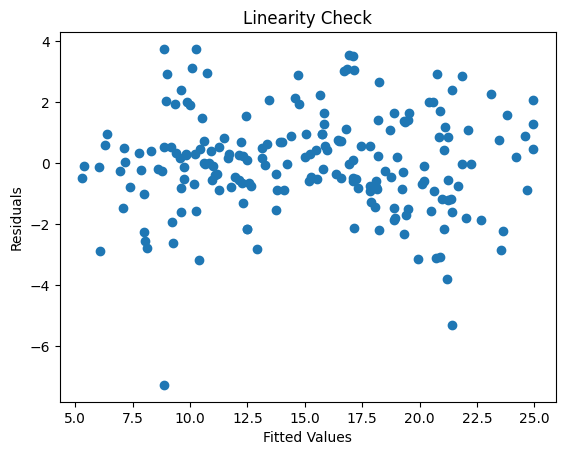

In [23]:
# Assumption 1: Linearity
# You can check linearity using residual vs. fitted values plot
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

In [24]:
# Assumption 2: Homoskedasticity
# You can check homoskedasticity using Breusch-Pagan test
_, p_homo, _, _ = sms.het_breuschpagan(residuals, X)
print(f"Homoskedasticity (Breusch-Pagan): p-value = {p_homo:.4f}")

Homoskedasticity (Breusch-Pagan): p-value = 0.2634


In [25]:
# Assumption 3: Independence (Serial Correlation)
# You can check for serial correlation using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Serial Correlation (Durbin-Watson): DW Statistic = {dw_stat:.2f}")

Serial Correlation (Durbin-Watson): DW Statistic = 2.25


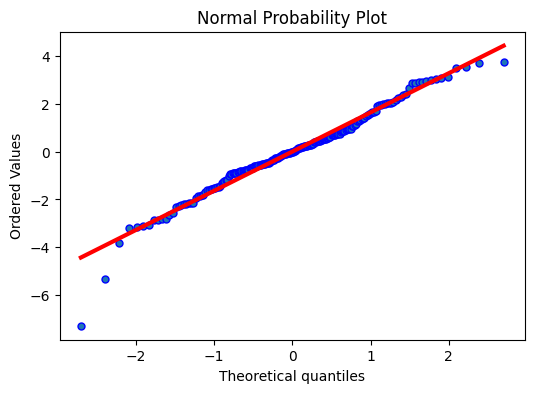

In [26]:
# Assumption 4: Normality
# You can check normality using a normal probability plot (Q-Q plot)
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(6, 4))
_, (__, ___, r) = stats.probplot(residuals, plot=ax, fit=True)
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[1].set_linewidth(3.0)
plt.title("Normal Probability Plot")
plt.show()

In [27]:
# Assumption 5: Multicollinearity
# You can check multicollinearity using the Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Multicollinearity (VIF):")
print(vif)

Multicollinearity (VIF):
    Features       VIF
0      const  6.898975
1         TV  1.005037
2      Radio  1.150018
3  Newspaper  1.150920


In [28]:
# Assumption 6: Outliers
# You can check for outliers using the studentized residuals and the Cook's distance
student_resid = model.get_influence().resid_studentized_internal
cooks_d = model.get_influence().cooks_distance[0]
outliers = pd.DataFrame({'Studentized Residuals': student_resid, "Cook's Distance": cooks_d})
outliers.index = X.index
print("Outliers:")
print(outliers[outliers['Studentized Residuals'].abs() > 2])  # You can adjust the threshold as needed

Outliers:
     Studentized Residuals  Cook's Distance
10                2.272004         0.021004
33               -2.322006         0.037363
97                2.148943         0.007995
130              -4.468814         0.195094
150              -3.233182         0.056641
154               2.120557         0.013399
196               2.261963         0.021244
